In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')

In [3]:
# Separate the features and the target variable
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [5]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [8]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', verbose=3)


In [9]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.844 total time=   4.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.853 total time=   4.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.841 total time=   4.3s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.847 total time=   4.4s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.845 total time=   4.4s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.843 total time=   4.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.848 total time=   4.2s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.836 total time=   4.4s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10;, score=0.843 total time=   4.4s
[CV 5/5] END max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy', verbose=3)

In [10]:
# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validated score: 0.8510544217687075


In [11]:
# Use the best estimator to predict the test set results
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)


In [12]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.85


In [13]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1233
           1       0.92      0.94      0.93      1436
           2       0.80      0.81      0.81      1247
           3       0.80      0.79      0.79      1322
           4       0.85      0.84      0.85      1184
           5       0.79      0.78      0.79      1172
           6       0.88      0.89      0.88      1225
           7       0.89      0.88      0.88      1294
           8       0.82      0.78      0.80      1215
           9       0.83      0.82      0.82      1272

    accuracy                           0.85     12600
   macro avg       0.85      0.85      0.85     12600
weighted avg       0.85      0.85      0.85     12600



In [14]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1157    0   11   17    8   11   14    2    9    4]
 [   3 1344   25   14    5    9   11   10   11    4]
 [  22   21 1009   43   13   12   30   44   28   25]
 [  21   20   42 1046   15   76    9   22   45   26]
 [  10   15   21   17 1000   17   17    9   33   45]
 [  30   14   16   68   15  920   39   10   35   25]
 [  22    3   29   11   23   29 1085    1   16    6]
 [  12   16   41   11   11    8    5 1137   11   42]
 [  25   27   39   47   25   43   19    8  946   36]
 [  11    4   24   37   60   34    4   39   22 1037]]


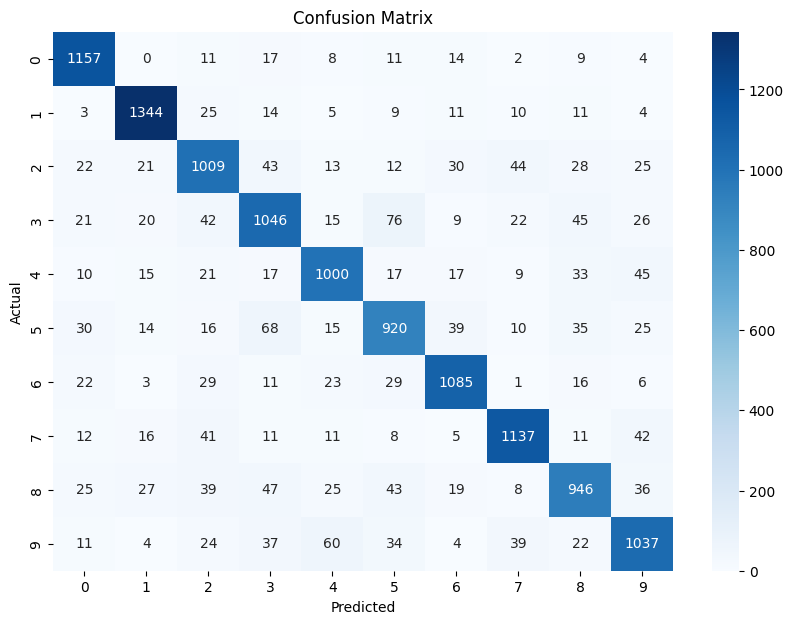

In [15]:
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()